In [1]:
# Import Packages

import os
import numpy as np
import spectral.io.envi as envi
from spectral import *

In [2]:
# Functions

def find_path_nextcloud():
    # Bestimmung des aktuellen Pfads
    current_path = os.path.abspath(os.getcwd())

    # Der Benutzername der Endgeräte unterscheidet sich
    # Festlegen des Pfads der Nextcloud in Abhängigkeit vom Benutzername
    if 'fgrassxx' in current_path:
        path_nextcloud_fg = open('../Daten_einlesen/path_nextcloud_fgrassxx.txt')
        path_nextcloud = path_nextcloud_fg.read()

    elif 'timo' in current_path:
        path_nextcloud_timo = open('../Daten_einlesen/path_nextcloud_timo.txt')
        path_nextcloud = path_nextcloud_timo.read()

    return path_nextcloud

path_nextcloud = find_path_nextcloud()
path_folder = path_nextcloud + 'Daten_Gyrocopter/Dessau/Hyperspektral/'
file_name = 'Dessau_unsigned_mosaik_all.hdr'

path_file = path_folder + file_name

In [3]:
path_nextcloud = find_path_nextcloud()
path_folder = path_nextcloud + 'Daten_Gyrocopter/Oldenburg/Hyperspektral/'


path_hdr = path_folder + 'Oldenburg-all.hdr'
path_dat =  path_folder + 'Oldenburg-all.dat'

img_his = envi.open(file=path_hdr, image=path_dat)

img_his

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Hyperspektral/Oldenburg-all.dat'
	# Rows:           1980
	# Samples:        3500
	# Bands:           107
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16

In [4]:
path_folder = path_nextcloud + 'Daten_Gyrocopter/Oldenburg/Thermal/'

path_hdr = path_folder + 'Thermal-Resized.hdr'
path_dat =  path_folder + 'Thermal-Resized'

img_thermal = envi.open(file=path_hdr, image=path_dat)

img_thermal

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Thermal/Thermal-Resized'
	# Rows:           1980
	# Samples:        3500
	# Bands:             1
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

In [5]:
path_folder = path_nextcloud + 'Daten_Gyrocopter/Oldenburg/DigitalesOberflaechenModel_normiert/'

path_hdr = path_folder + 'DGM-DTM-Resized.hdr'
path_dat =  path_folder + 'DGM-DTM-Resized'

img_dom = envi.open(file=path_hdr, image=path_dat)
img_dom

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/DigitalesOberflaechenModel_normiert/DGM-DTM-Resized'
	# Rows:           1980
	# Samples:        3500
	# Bands:             1
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

In [6]:
# Laden der Bildinformationen
arr_his = img_his.load()
arr_thermal = img_thermal.load()
arr_dom = img_dom.load()

In [15]:
# Zusammenführen Bildinformationen
combined_arr = np.concatenate((arr_his, arr_thermal),-1)
combined_arr = np.concatenate((combined_arr, arr_dom),-1)

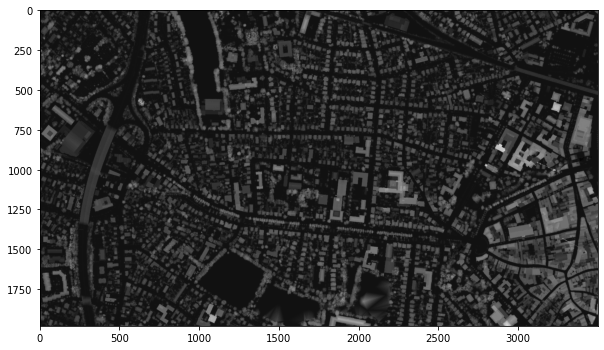

In [16]:
# Höhenmeter-Bild aus einzelner Datei
view = imshow(arr_dom, figsize=(10,10))

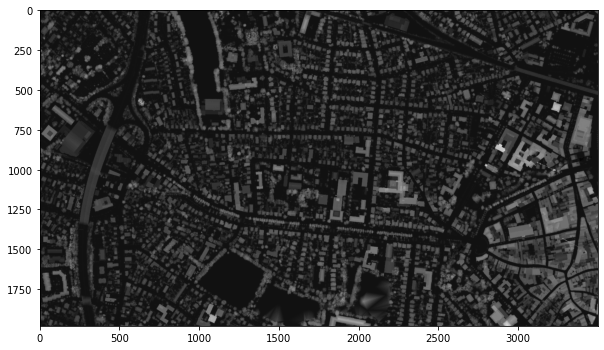

In [17]:
# Höhenmeter-Bild aus einzelnem Band der zusammengeführten Datei
view = imshow(combined_arr[:,:,108], figsize=(10,10))

In [18]:
new_bands = ['thermal', 'dom']
arr_metadata = img_his.metadata

for new_band in new_bands:
    arr_metadata['wavelength'].append(new_band)
    arr_metadata['band names'].append(new_band)
    arr_metadata['fwhm'].append(new_band)

arr_metadata['bands'] = len(arr_metadata['wavelength'])
arr_metadata

{'description': 'File Resize Result, x resize factor: 1.000000, y resize factor: 1.000000.\n[Wed Nov 30 15:22:58 2011]',
 'samples': '3500',
 'lines': '1980',
 'bands': 109,
 'header offset': '0',
 'file type': 'ENVI Standard',
 'data type': '12',
 'interleave': 'bsq',
 'sensor type': 'Unknown',
 'byte order': '0',
 'x start': '4552',
 'y start': '1330',
 'map info': ['UTM',
  '1.000',
  '1.000',
  '445703.140',
  '5888996.723',
  '5.0000000000e-001',
  '5.0000000000e-001',
  '32',
  'North',
  'WGS-84',
  'units=Meters'],
 'default bands': ['75', '54', '32'],
 'wavelength units': 'Unknown',
 'band names': ['Resize (Resize (Mosaic (Band 1):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 2):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 3):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 4):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 5):1_to_10_full_mosaic)

In [19]:
from spectral import envi

envi.save_image(hdr_file='combined_arr.hdr', image=combined_arr,
                dtype = "float32", ext='.dat', interleave = 'bsq',
                metadata=arr_metadata, force = True)

In [20]:
path_hdr = 'combined_arr.hdr'
path_dat = 'combined_arr.dat'

img_new = envi.open(file=path_hdr, image=path_dat)

img_new

	Data Source:   '.\combined_arr.dat'
	# Rows:           1980
	# Samples:        3500
	# Bands:           109
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

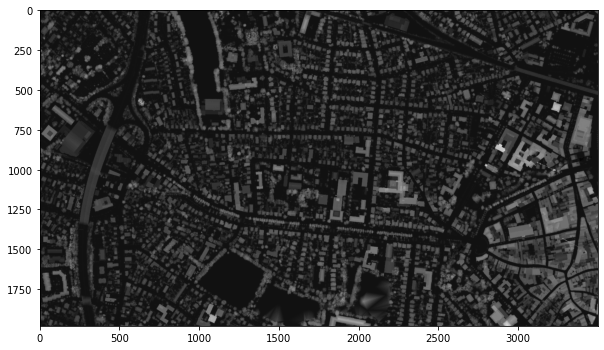

In [21]:
# Höhenmeter-Bild aus einzelner Datei
view = imshow(arr_dom, figsize=(10,10))

In [22]:
# Höhenmeter-Bild aus einzelnem Band der zusammengeführten Datei
arr_new = img_new.load()

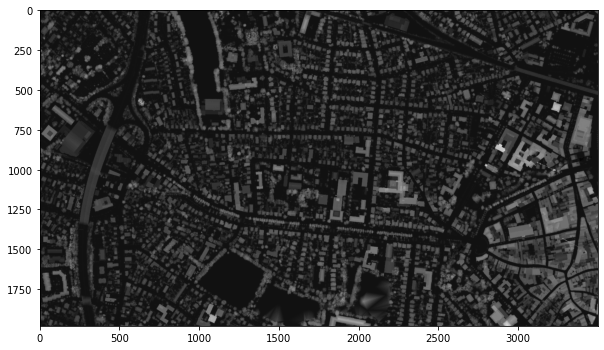

In [34]:
view = imshow(arr_new[:,:,108], figsize=(10,10))

In [31]:
arr_new[50:55,50:55,108] - arr_dom[50:55,50:55,:]

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]]], dtype=float32)

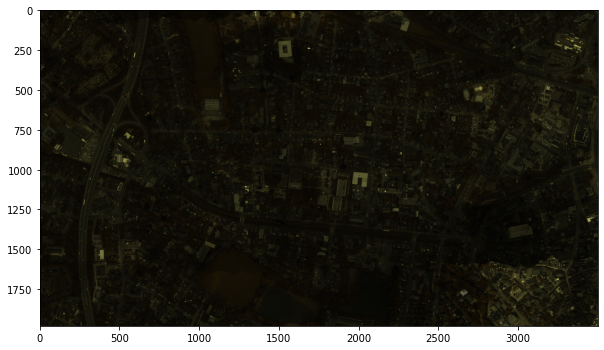

In [36]:
view = imshow(arr_new, bands=(27,21,4), figsize=(10,10))
